# Testing if the wedge exhumation model works & makes sense

This notebook includes a series of validation steps in the development of the equations for the exhumation of an orogenic wedge.

The equations are based on a conceptual model as shown below:



![Conceptual model for an orogenic wedge that moves up a sloping detachment and is compressed, with the surface staying at the same level](../fig/Wedge_concept_figure.png)

**Fig. 1** *Conceptual model of an orogenic wedge and an overview of the parameters used in the analytical solution of rock particle trajectories inside the wedge*

* L is the width of the wedge
* $v_d$ is the velcoity of the wedge itself
* $v_c$ is the compression velocity of the wedge, which is equal to the max. horizontal velocity at the right hand side of the wedge
* $\alpha$ is the slope of the land surface (m/m)
* $\beta$ is the slope of the bottom of the wedge (m/m)

## Import modules

In [67]:
%matplotlib inline

import itertools
import string
import numpy as np
import matplotlib.pyplot as pl
import scipy.interpolate

pl.rcParams['mathtext.default'] = 'regular'

## Some parameters

In [68]:
## parameter set 1
model_run_name = 'case1'
vc = -2e-3
vd = -2e-3
vxa = 0.0
vya = 0.0

## parameter set 2
#model_run_name = 'case2'
#vc = -2e-3
#vd = 0.0
#vxa = 1e-3 
#vya = 1e-4 

fig_width = 210 / 25.4

year = 365.25 * 24 * 3600

# lenght of wedge
L = 200e3

# x distance between starting pts:
dx_starting_points = 5e3

# slope of topography (m/m)
alpha = 0.05

# slope of bottom of wedge (m/m)
beta = -0.15

# number of rows for the numerical solution
n_rows = 100

# show particle tracks for each x starting pts
starting_pt_int = 4

# isochrons to show in figures
#isochrons = [-25 * 1e6, -50* 1e6, -75e6, -100* 1e6, -125e6, -150* 1e6]
isochrons = np.array([5, 10, 20, 40, 80]) * -1e6

# scale of quiver arrows
scale = 2.0
# scale of velocity arrows
arrow_scale = 0.05
# width of arrows
width = 0.007
# show one in x arrows in velocity field
arrow_int = 30

# show arrow for each x particle tracking steps
quiver_step = 500
#quiver_step = 250

## Scientific colormap

In [69]:
from cmcrameri import cm
cmap = cm.batlow

## Parameters for particle position over time

In [70]:
# x-coordinates of starting points:
x0s = np.arange(0, L + dx_starting_points, dx_starting_points)

# timesteps (years)
t = np.linspace(0, -3e8, 10001)

print('particle starting points: ', x0s)

print('timesteps (Myr): ', t / 1e6)

particle starting points:  [     0.   5000.  10000.  15000.  20000.  25000.  30000.  35000.  40000.
  45000.  50000.  55000.  60000.  65000.  70000.  75000.  80000.  85000.
  90000.  95000. 100000. 105000. 110000. 115000. 120000. 125000. 130000.
 135000. 140000. 145000. 150000. 155000. 160000. 165000. 170000. 175000.
 180000. 185000. 190000. 195000. 200000.]
timesteps (Myr):  [ 0.0000e+00 -3.0000e-02 -6.0000e-02 ... -2.9994e+02 -2.9997e+02
 -3.0000e+02]


## Determine isochrons to show in figures

In [71]:
isochron_ts = [np.argmin(np.abs(t - ic)) for ic in isochrons]

## Set up functions to calculate particle velocities in wedge:

In [72]:
def velocity_compression(xs, ys, alpha, beta, L, vc):
    
    gamma = alpha - beta
    
    vx = xs / L * vc
    
    vy = vc / L * ( (-2 - (beta / (alpha - beta)) ) * ys \
                   + (2 * beta + (alpha * beta)/(alpha - beta)) * xs)

    return vx, vy

## set up geometry of wedge

In [73]:
xcoords = np.linspace(0, L, 1001)
y_top = xcoords * alpha
y_bottom = xcoords * beta

H = y_top.max() - y_bottom.min()

print('with the chosen slopes of land surface and wedge bottom/detachment the max height of '
      'the wedge is : ', H / 1e3, ' km')

ys = np.zeros((len(xcoords), n_rows))
xs = np.zeros_like(ys)
ybs = np.zeros_like(ys)

for i in range(len(xcoords)):
    ys[i, :] = np.linspace(y_bottom[i], y_top[i], n_rows)
    xs[i, :] = xcoords[i]
    ybs[i, :] = y_bottom[i]

with the chosen slopes of land surface and wedge bottom/detachment the max height of the wedge is :  40.0  km


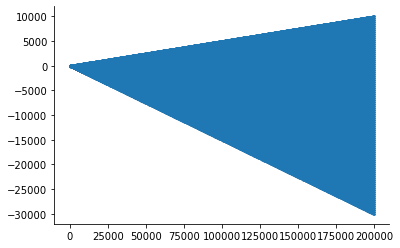

In [74]:
fig,ax = pl.subplots(1, 1)
ax.scatter(xs, ys, s=2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

**Fig caption** *Shape of the wedge and numerical grid*

## Check the calculated velocities due to compression

/Users/elcopone/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


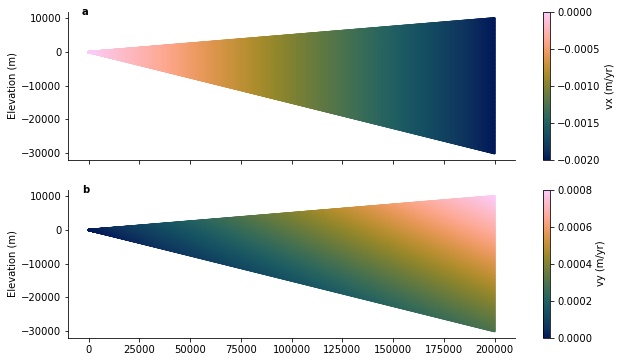

In [75]:
# calculate velocities:
#vxc_simple, vyc_simple = velocity(xs, ys, beta, L, vc)

vxc, vyc = velocity_compression(xs, ys, alpha, beta, L, vc)

#double check
vyt = 2 * H / L**2 * xs * vc

h = xs / L * H

#vytc = h / (ys - ybs) * vy

vy_check = (ys - ybs) / h * vyt

fig, axs = pl.subplots(2, 1, figsize=(10, 6), sharex=True)

cb1 = axs[0].scatter(xs, ys, c=vxc, s=2, cmap=cmap)
cb = fig.colorbar(cb1, ax=axs[0])
cb.set_label('vx (m/yr)')

#cb3 = axs[1].scatter(xs, ys, c=vyc_simple, s=2)
#cb = fig.colorbar(cb3, ax=axs[1])
#cb.set_label('vy, simplified (m/yr)')

cb2 = axs[1].scatter(xs, ys, c=vyc, s=2, cmap=cmap)
cb = fig.colorbar(cb2, ax=axs[1])
cb.set_label('vy (m/yr)')

for i, ax in enumerate(axs):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(0.03, 1.03, string.ascii_lowercase[i], 
            weight='bold', transform=ax.transAxes, 
               ha='left', va='top', fontsize='medium')
    
for ax in axs:
    ax.set_ylabel('Elevation (m)')

**Fig. caption** *Calculated horizontal and vertical velocties in a wegde that undergoes horizontal compression. a) horizontal velocity, b) vertical velocity*

## Make a figure of particle velocity due to compression in the wedge

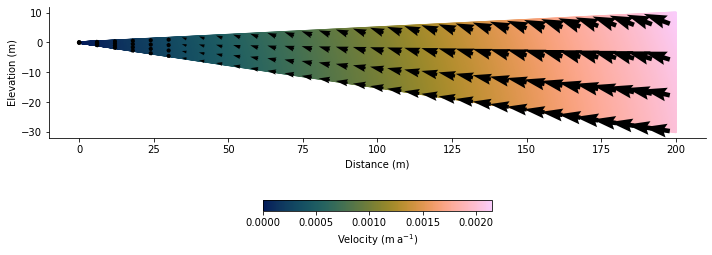

In [76]:
ai = 30

v = np.sqrt(vxc**2 + vyc**2)

fig, ax = pl.subplots(1, 1, figsize=(10, 6))

leg_v = ax.scatter(xs / 1e3, ys / 1e3, c=v, s=2, cmap=cmap)
ax.quiver(xs[::ai, ::ai] / 1e3, 
          ys[::ai, ::ai] / 1e3, 
          vxc[::ai, ::ai], 
          vyc[::ai, ::ai], scale=arrow_scale, width=width)

ax.set_aspect('equal')

cb = fig.colorbar(leg_v, shrink=0.35, orientation='horizontal')
cb.set_label(r'Velocity ($m \; a^{-1}$)')
#ax.set_title('Velocity field')


#for i, ax in enumerate(axs):
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.text(0.03, 1.03, string.ascii_lowercase[i], 
    #        weight='bold', transform=ax.transAxes, 
    #           ha='left', va='top', fontsize='medium')

ax.set_ylabel('Elevation (m)')
ax.set_xlabel('Distance (m)')
fig.tight_layout()

fig.savefig('fig/particle_velocity_vectors_compression.pdf')
fig.savefig('fig/particle_velocity_vectors_compression.png')

**Fig caption** *Particle velocity vectors in the wedge due to compression*

## Set up functions for particle elevation over time:

In [77]:
def x_over_time(x0, vc, t, L):
    '''
    Horizontal position (x) over time (t)
    '''
    
    xh = x0 * np.exp((vc*t/L))
    
    return xh


def y_position_over_time_correct(t, x0, alpha, beta, vc, L):
    
    """
    This is the full solution by Leo:
    """
    
    y0 = alpha * x0
    
    C1 = vc / L * (-2 - (beta / (alpha - beta)))
    
    C2 = vc / L * (2 * beta + (alpha * beta / (alpha-beta)))
    
    yloc = C2 * x0 *np.exp(vc * t / L) / (vc/L - C1) + (y0 -(C2* x0)/(vc/L -C1))*np.exp(C1 * t)

    return yloc
    
    
def y_position_over_time_correct_v2(t, x0, alpha, beta, vc, L):
    
    """
    This is the full solution by Leo, but then rewritten and simplified
    """
    
    y0 = alpha * x0
    
    v = vc/L
    
    C5 = -2 - (beta / (alpha - beta))
    
    
    yloc = beta * x0 *np.exp(v * t) + (y0 -(beta * x0))*np.exp(C5 * v * t)

    #$$y= \beta x_0 e^{v t} + \left( y_0 - \beta x_0 \right) e^{C_5 v t}$$
    
    return yloc
    


## Testing the integration of y over time:

In [78]:
xpc = np.array([x_over_time(x0, vc, t, L) for x0 in x0s])

# elimnate values outside the wedge
xpc[xpc>L] = np.nan

ypc = np.array([y_position_over_time_correct(t, x0, alpha, beta, vc, L) for x0 in x0s])

ypc2 = np.array([y_position_over_time_correct_v2(t, x0, alpha, beta, vc, L) for x0 in x0s])


## Derive particle trajectories using numerical backstepping

In [79]:
def numerical_particle_trajectory_compression(t, x0, alpha, beta, L, vc, simple_method=False):
    
    xp = [x0]
    yp = [x0 * alpha]
    
    vx, vy = velocity_compression(xp[-1], yp[-1], alpha, beta, L, vc)
        
    dt = np.diff(t)
    
    for dti in dt:
        xp.append(xp[-1] + vx * dti)
        yp.append(yp[-1] + vy * dti)
        
        vx, vy = velocity_compression(xp[-1], yp[-1], alpha, beta, L, vc)
            
    return np.array(xp), np.array(yp)

In [80]:
xypc_num = np.array([numerical_particle_trajectory_compression(t, x0, alpha, beta, L, vc) for x0 in x0s])

xpc_num, ypc_num = xypc_num[:, 0], xypc_num[:, 1]


## Plot trajectories over time

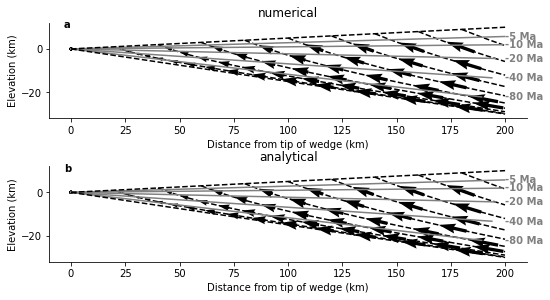

In [81]:
#scale = 2.0
#width = 0.004



fig, axs = pl.subplots(2, 1, figsize=(fig_width, fig_width/2.0))

labels = ['numerical', 'analytical']

for ax, xpi, ypi, label in zip(axs, [xpc_num, xpc, xpc, xpc], 
                               [ypc_num, ypc], labels):
    
    ind = xpi > L
    xpi[ind] = np.nan
    ypi[ind] = np.nan
    
    for xl, yl in zip(xpi[::starting_pt_int], ypi[::starting_pt_int]):
        leg_traj, = ax.plot(xl / 1e3, yl / 1e3, color='black', ls='--')
        
        x, y = xl[::-quiver_step] / 1e3, yl[::-quiver_step] / 1e3
        U, V = x[1:]-x[:-1], y[1:]-y[:-1]
        #U = U / np.sqrt(U**2 + V**2)
        #V = V / np.sqrt(U**2 + V**2)
        leg_qv = ax.quiver(x[:-1], y[:-1], U, V, 
                            scale_units='xy', angles='xy', scale=scale, width=width)

    nt = xpi.shape[1]
        
    for nti in isochron_ts:
        #leg_ts =  ax.scatter(xpi[:, nti] / 1e3, ypi[:, nti] / 1e3, s=20, color='black')
        leg_tsl, =  ax.plot(xpi[:, nti] / 1e3, ypi[:, nti] / 1e3, color='gray', ls='-')
        tekst = '%0.0f Ma' % (t[nti] / 1e6)
        
        ind = np.isnan(xpi[:, nti]) == False
        
        if np.sum(ind) > 0:
        
            #ax.text(xpi[ind, nti][-1] / 1e3, ypi[ind, nti][-1] / 1e3, tekst, ha='left', va='center', weight='bold', color='gray')
            ax.text(L / 1e3, ypi[ind, nti][-1] / 1e3, tekst, ha='left', va='center', weight='bold', color='gray')
            pass

    
    leg_bnd, = ax.plot(xcoords / 1e3, y_top / 1e3, color='black', ls='--', lw=1.5)
    ax.plot(xcoords / 1e3, y_bottom / 1e3, color='black', ls='--', lw=1.5)
    
    ax.set_title(label)

for i, ax in enumerate(axs):
    ax.set_xlabel('Distance from tip of wedge (km)')
    ax.set_ylabel('Elevation (km)')

    ax.set_aspect('equal')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(0.03, 1.03, string.ascii_lowercase[i], 
            weight='bold', transform=ax.transAxes, 
               ha='left', va='top', fontsize='medium')
    
#fig.legend([leg_traj, leg_tsl, leg_bnd], 
#          ['particle trajectories', 'Timesteps', 'Isochron', 'Wedge boundaries'], 
#          loc='lower center', ncol=2)

fig.tight_layout()

fig.savefig('fig/comparison_analytical_numerical_solution_compression.pdf')
fig.savefig('fig/comparison_analytical_numerical_solution_compression.png')

**Fig caption** *From top to bottom: a) numerical solution for particle trajectories in a wedge that undergoes horizontal compression. b) analytical solution*

## Numerical solution with transport velocity

The previous figures only inlcuded the particle velcotiy due to compression. In the following blocks we will try to add in the velocity due to the transport of the wedge.

## Set up a function for calculating velocity

In [82]:
def velocity_compression_and_transport_old(xs, ys, alpha, beta, L, vc, vd, return_all=False):
    
    gamma = alpha - beta
    
    vxc = xs / L * vc
    
    vyc = vc / L * ( (-2 - (beta / (alpha - beta)) ) * ys + (2 * beta + (alpha * beta)/(alpha - beta)) * xs)
    
    vxd = np.ones_like(xs) * vd
    
    vyd = np.ones_like(xs) * beta * vd
    
    vx = vxc + vxd
    
    vy = vyc + vyd
    
    if return_all is True:
        return vx, vy, vxc, vyc, vxd, vyd
    else:
        return vx, vy
    
    
def velocity_compression_and_transport(xs, ys, alpha, beta, L, vc, vd, vxa, vya, return_all=False):
    
    epsilon = -2 - (beta / (alpha - beta))
    
    zeta = 2 * beta + (alpha * beta) / (alpha - beta)
    
    vn = vc / L
    
    vxc = np.ones_like(xs) * vn * xs
    
    vyc = np.ones_like(xs) * vn * (epsilon * ys + zeta * xs)
    
    vxt = np.ones_like(xs) * vd + vxa
    
    vyt = np.ones_like(xs) * beta * vd + vya
    
    vx = vxc + vxt
    
    vy = vyc + vyt
    
    if return_all is True:
        return vx, vy, vxc, vyc, vxt, vyt
    else:
        return vx, vy

## Calculate velocity field

In [83]:
vx, vy, vxc, vyc, vxd, vyd = velocity_compression_and_transport(xs, ys, alpha, beta, L, vc, vd, 
                                                                vxa, vya,
                                                                return_all=True)

## Make a figure of particle velocity in the wedge

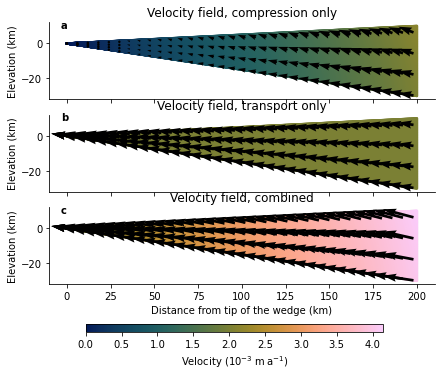

In [84]:
#arrow_int = 10
#scale = 2.0e-2
#width = 0.004

fig, axs = pl.subplots(3, 1, figsize=(fig_width, fig_width * 2 / 3.), sharex=True)

va = np.sqrt(vx**2 + vy**2) * 1e3

vmin, vmax = 0, np.max(va)

for ax, vxi, vyi in zip(axs, [vxc, vxd, vx], [vyc, vyd, vy]):

    vi = np.sqrt(vxi**2 + vyi**2)

    legv = ax.scatter(xs / 1e3, ys / 1e3, c=vi * 1e3, s=2, vmin=vmin, vmax = vmax, cmap=cmap)
    ax.quiver(xs[::arrow_int, ::arrow_int] / 1e3, 
              ys[::arrow_int, ::arrow_int] / 1e3, 
              vxi[::arrow_int, ::arrow_int], 
              vyi[::arrow_int, ::arrow_int], scale=arrow_scale, width=width)

    ax.set_aspect('equal')

#cb = fig.colorbar(legv, orientation='horizontal', shrink=0.5)
#cb.set_label(r'Velocity ($m a^{-1}$)')

axs[0].set_title('Velocity field, compression only')
axs[1].set_title('Velocity field, transport only')
axs[2].set_title('Velocity field, combined')


for i, ax in enumerate(axs):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(0.03, 1.03, string.ascii_lowercase[i], 
            weight='bold', transform=ax.transAxes, 
               ha='left', va='top', fontsize='medium')

for ax in axs:
    ax.set_ylabel('Elevation (km)')
    
axs[-1].set_xlabel('Distance from tip of the wedge (km)')

#fig.tight_layout()

fig.subplots_adjust(bottom=0.22)

cax = fig.add_axes([0.25, 0.1, 0.5, 0.02])

cb = fig.colorbar(legv, orientation='horizontal', shrink=0.4, cax=cax)

cb.set_label(r'Velocity ($10^{-3} \; m\;a^{-1}$)')

fig.savefig('fig/velocity_fields_%s.pdf' % model_run_name)
fig.savefig('fig/velocity_fields_%s.png' % model_run_name)

## Calculate particle trajectories

Next we will use a numerical backstepping procedure using the velocity field to calculate the particle positions over time

In [85]:
def numerical_particle_trajectory_full(t, x0, alpha, beta, L, vc, vd, vxa, vya):
    
    xp = [x0]
    yp = [x0 * alpha]
    
    vx, vy = velocity_compression_and_transport(xp[-1], yp[-1], alpha, beta, L, vc, vd, vxa, vya)
        
    dt = np.diff(t)
    
    for dti in dt:
        xp.append(xp[-1] + vx * dti)
        yp.append(yp[-1] + vy * dti)
        
        vx, vy = velocity_compression_and_transport(xp[-1], yp[-1], alpha, beta, L, vc, vd, vxa, vya)
    
    x = np.array(xp)
    y = np.array(yp)
    
    # remove particles below bottom wedge
    b = beta * x
    
    outside_domain = y < b
    y[outside_domain] = np.nan
            
    return x, y

In [86]:
xyp_num = np.array([numerical_particle_trajectory_full(t, x0, alpha, beta, L, vc, vd, vxa, vya) for x0 in x0s])

xp_num, yp_num = xyp_num[:, 0], xyp_num[:, 1]

## Analytical solution

Next we will evaluate a simplified analytical solution for particle positions over time. This is an exact solution for x. The simplified solution for y calculates depth over time for compression and transport separately and then adds them together. The full solution solves for transport and compression simultaneously


In [87]:
def analytical_solution_combined_simplified(t, x0, alpha, beta, L, vc, vd, vxa, vya):
    
    
    epsilon = -2 - (beta / (alpha - beta))
    
    zeta = 2 * beta + (alpha * beta) / (alpha - beta)
    
    vxt = vd + vxa
    
    vyt = beta * vd + vya
    
    vn = vc / L
    
    x = (x0 + vxt / vn) * np.exp(vn * t) - vxt / vn
    
    d = - vyt * t + (alpha - beta) * x0 * (np.exp(vn * t) - np.exp(epsilon * vn * t))
    
    y = alpha * x0 - d

    # remove particles below bottom wedge
    b = beta * x
    
    outside_domain = y < b
    y[outside_domain] = np.nan
    
    return x, y


def analytical_solution_combined_old(t, x0, alpha, beta, L, vc, vd):
    
    """
    new full solution, 14 dec 2020
    """
    
    y0 = alpha * x0
    
    vxt = vd
    vyt = beta * vd
    
    vn = vc / L
    
    epsilon = -2 - (beta / (alpha - beta))
    
    zeta = 2 * beta + (alpha * beta) / (alpha - beta)
    
    C1 = vn * epsilon
    
    C2 = vn * zeta
    
    C7 = C2 * (x0 + vxt / vn)
    
    C8 = vyt - C2 * (vxt / vn)
    
    lambda0 = C7 / (vn - C1) - C8 / C1
    
    lambdat = C7 / (vn - C1) * np.exp((vn - C1)*t) - C8 / C1 * np.exp(-C1 * t)
    
    y = (y0 + lambdat - lambda0) * np.exp(C1 * t)
    #y = y0  * np.exp(C1 * t)
    
    x = (x0 + vxt / vn) * np.exp(vn*t) - (vxt / vn)

    # remove particles below bottom wedge
    b = beta * x
    
    outside_domain = y < b
    y[outside_domain] = np.nan
    
    return x, y


def analytical_solution_combined(t, x0, alpha, beta, L, vc, vd, vxa, vya):
    
    """
    new full solution, 14 dec 2020
    """
    
    y0 = alpha * x0
    
    epsilon = -2 - (beta / (alpha - beta))
    
    zeta = 2 * beta + (alpha * beta) / (alpha - beta)
    
    eta = 1 - epsilon
    
    vn = vc / L
    
    vxt = vd + vxa
    
    vyt = beta * vd + vya
    
    C1 = vn * epsilon
    C2 = vn * zeta
    
    C3 = C2 * (x0 + vxt / vn)
    C4 = vyt - C2 * (vxt / vn)
    
    x = (x0 + vxt / vn) * np.exp(vn * t) - vxt / vn
    
    y = (alpha * x0 + beta * (x0 + vxt / vn) * (np.exp(vn * (1 - epsilon) * t) - 1) - ((vyt - zeta * vxt) / (vn * epsilon) * (np.exp(-vn*epsilon*t) - 1))) * np.exp(vn * epsilon * t)
    
    # remove particles below bottom wedge
    b = beta * x
    
    outside_domain = y < b
    y[outside_domain] = np.nan
    
    return x, y
    

## Run the solution for several particles

In [88]:
# np.array([y_position_over_time_correct_v2(t, x0, alpha, beta, vc, L) for x0 in x0s])

xyps = np.array([analytical_solution_combined_simplified(t, x0, alpha, beta, L, vc, vd, vxa, vya) 
                 for x0 in x0s])

xps, yps = xyps[:, 0], xyps[:, 1]

xyp = np.array([analytical_solution_combined(t, x0, alpha, beta, L, vc, vd, vxa, vya) for x0 in x0s])

xp, yp = xyp[:, 0], xyp[:, 1]

In [89]:
def convert_to_grid(x, y, z, dx, dy):
    
    """
    convert flux to regular grid
    """

    # interpolate pressure on regular grid
    xi = np.arange(x.min(), x.max() + dx, dx)
    yi = np.arange(y.min(), y.max() + dy, dy)
    xg, yg = np.meshgrid(xi, yi)
    xgqf, ygqf = xg.flatten(), yg.flatten()

    # interpolate u to grid
    xyq_pts = np.vstack((x, y)).T
    z_interp = scipy.interpolate.griddata(xyq_pts,
                                           z,
                                           np.vstack((xgqf, ygqf)).T,
                                           method='linear')
    z_interp1 = np.resize(z_interp, xg.shape)
    
    return xg, yg, z_interp1

## Plot numerical and analytically derived particle trajectories over time

/Users/elcopone/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide
/Users/elcopone/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide
/Users/elcopone/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:70: UserWarning: The following kwargs were not used by contour: 'lw'


saving fig as fig/comparison_analytical_and_numerical_solution_case1.pdf
saving fig as fig/comparison_analytical_and_numerical_solution_case1.png


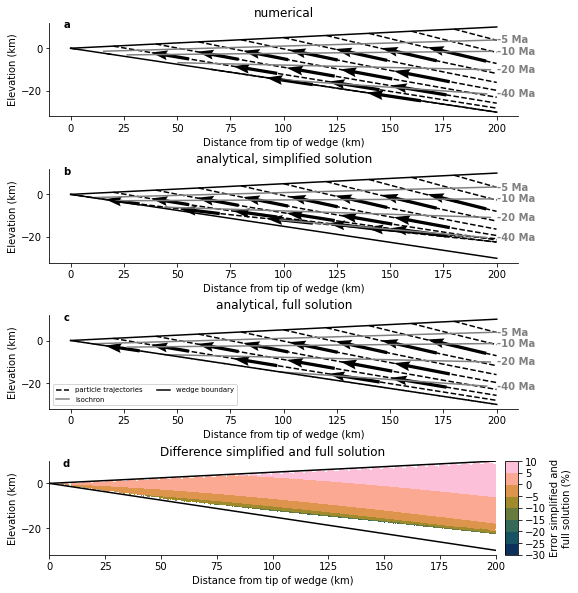

In [90]:
fig, axs = pl.subplots(4, 1, figsize=(fig_width, fig_width))

labels = ['numerical', 
          'analytical, simplified solution',
         'analytical, full solution']


for ax, xpi, ypi, label in zip(axs, 
                               [xp_num, xps, xp], 
                               [yp_num, yps, yp], 
                               labels):
    
    ind = xpi > L
    xpi[ind] = np.nan
    ypi[ind] = np.nan
    
    for xl, yl in zip(xpi[::starting_pt_int], ypi[::starting_pt_int]):
        leg_traj, = ax.plot(xl / 1e3, yl / 1e3, color='black', ls='--')
        x, y = xl[::-quiver_step] / 1e3, yl[::-quiver_step] / 1e3
        U, V = x[1:]-x[:-1], y[1:]-y[:-1]
        #U = U / np.sqrt(U**2 + V**2)
        #V = V / np.sqrt(U**2 + V**2)
        leg_qv = ax.quiver(x[:-1], y[:-1], U, V, 
                            scale_units='xy', angles='xy', scale=scale, width=width)

    nt = xpi.shape[1]
    
    for nti in isochron_ts:
        #leg_ts =  ax.scatter(xpi[:, nti] / 1e3, ypi[:, nti] / 1e3, s=20, color='black')
        leg_tsl, =  ax.plot(xpi[:, nti] / 1e3, ypi[:, nti] / 1e3, color='gray', ls='-')
        tekst = '%0.0f Ma' % (t[nti] / 1e6)
        
        ind = np.isnan(xpi[:, nti]) == False
        
        if np.sum(ind) > 0:
            #ax.text(xpi[ind, nti][-1] / 1e3, ypi[ind, nti][-1] / 1e3, tekst, ha='left', va='center', weight='bold', color='gray')
            ax.text(L / 1e3, ypi[ind, nti][-1] / 1e3, tekst, 
                    ha='left', va='center', weight='bold', color='gray')
            
    leg_bnd, = ax.plot(xcoords / 1e3, y_top / 1e3, color='black', ls='-', lw=1.5)
    ax.plot(xcoords / 1e3, y_bottom / 1e3, color='black', ls='-', lw=1.5)
    
    ax.set_title(label)

## add panel with difference analytical and numerical solution

dpn = alpha * xp_num - yp_num
dps = alpha * xps - yps
dp = alpha * xp - yp

#diff_dps = dps - dpn
diff_dps = dps - dp
rdiff_dps = diff_dps / dps * 100.0

diff_dp = dp - dpn
rdiff_dp = diff_dp / dp * 100.0


xps1 = xps.ravel()
yps1 = yps.ravel()
rd1 = rdiff_dps.ravel()

ind = np.logical_and(np.isnan(xps1)==False, np.isnan(yps1)==False)

xg, yg, zg = convert_to_grid(xps1[ind], yps1[ind], rd1[ind], 100.0, 10.0)

yg_top = xg * alpha
zg[yg>yg_top] = np.nan

cf = axs[-1].contourf(xg / 1000.0, yg / 1000.0, zg, cmap=cmap, lw=1.0)

axs[-1].plot(xcoords / 1e3, y_top / 1e3, color='black', ls='-', lw=1.5)
axs[-1].plot(xcoords / 1e3, y_bottom / 1e3, color='black', ls='-', lw=1.5)

    
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
ax1_divider = make_axes_locatable(axs[-1])
# Add an axes to the right of the main axes.
cax1 = ax1_divider.append_axes("right", size="3%", pad="2%")
cb1 = fig.colorbar(cf, cax=cax1)
cb1.set_label('Error simplified and\nfull solution (%)')

axs[-1].set_title('Difference simplified and full solution')

for i, ax in enumerate(axs):
    ax.set_xlabel('Distance from tip of wedge (km)')
    ax.set_ylabel('Elevation (km)')

    ax.set_aspect('equal')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(0.03, 1.03, string.ascii_lowercase[i], 
            weight='bold', transform=ax.transAxes, 
               ha='left', va='top', fontsize='medium')
    
axs[-2].legend([leg_traj, leg_tsl, leg_bnd], 
          ['particle trajectories', 'Isochron', 'wedge boundary'], 
          loc='lower left', ncol=2, fontsize='x-small')

fig.tight_layout()

fn = 'fig/comparison_analytical_and_numerical_solution_%s.pdf'  % model_run_name
print('saving fig as %s' % fn)
fig.savefig(fn)

fn = 'fig/comparison_analytical_and_numerical_solution_%s.png'  % model_run_name
print('saving fig as %s' % fn)
fig.savefig(fn)

**Fig caption** *(a) numerical solution for particle trajectories in a wedge that is transported sideways and upward along a basal detachment, and that undergoes horizontal compression. (b) simplified analytical solution, with correct equation for x and adding depth due to compression and depth due to transport, (c) full solution.*

In [91]:
yps1

array([  0.,  -9., -18., ...,  nan,  nan,  nan])

## Figure with comparison solutions vs depth

/Users/elcopone/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/Users/elcopone/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


saving fig as fig/error_simplified_solution_case1.pdf
saving fig as fig/error_simplified_solution_case1.svg
saving fig as fig/error_simplified_solution_case1.png


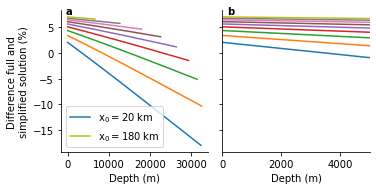

In [92]:
first_label = 0

fig, axs = pl.subplots(1, 2, figsize=(fig_width * 2/3., fig_width / 3.0 ), 
                       sharex='col', sharey='row')

lss = ['-', ':', '--']

dpn = alpha * xp_num - yp_num
dps = alpha * xps - yps
dp = alpha * xp - yp

#diff_dps = dps - dpn
diff_dps = dps - dp
rdiff_dps = diff_dps / dps * 100.0

diff_dp = dp - dpn
rdiff_dp = diff_dp / dp * 100.0

#for i, di, x0i in zip(itertools.count(), rdiff_dps[::starting_pt_int], x0s[::starting_pt_int]):
#    if i == 1 or i == (len(rdiff_dps[::starting_pt_int]) - 2):
#        axs[0].plot(t / 1e6, di, label=r'$x_0=%0.0f\;km$' % (x0i / 1e3))
#    axs[0].plot(t / 1e6, di)

#for di in rdiff_dp[::starting_pt_int]:
#    axs[1, 0].plot(t / 1e6, di)

#axs[0].legend()

for i, dpsi, di, x0i in zip(itertools.count(), dps[::starting_pt_int][1:], rdiff_dps[::starting_pt_int][1:], x0s[::starting_pt_int][1:]):
    if i == 0 or i == (len(rdiff_dps[::starting_pt_int]) - 3):
        label = r'$x_0=%0.0f\;km$' % (x0i / 1e3)
        axs[0].plot(dpsi, di, label=label)
    else:
        axs[0].plot(dpsi, di, ls='-')
    axs[1].plot(dpsi, di, ls='-')

axs[0].legend()

#for dpi, di in zip(dp[::starting_pt_int], rdiff_dp[::starting_pt_int]):
#    axs[1, 1].plot(dpi, di)
#    axs[1, 2].plot(dpi, di)

axs[0].set_ylabel('Difference full and\nsimplified solution (%)') 
#axs[1, 0].set_ylabel('Difference numerical and full solution (m)')

#axs[0].set_xlabel('Time (Ma)')
axs[0].set_xlabel('Depth (m)')
axs[1].set_xlabel('Depth (m)')

#axs[1, 2].set_xlim(0, 5000)
axs[1].set_xlim(0, 5000)



#ym = axs[0, 1].get_ylim()
#axs[0, 1].plot([0, 40000], [0, 40000], color='black', ls=':')
#ym = axs[0, 1].set_ylim(ym)

#ym = axs[1, 1].get_ylim()
#axs[1, 1].plot([0, 40000], [0, 40000], color='black', ls=':')
#ym = axs[1, 1].set_ylim(ym)

#for xpi, ypi, ls, label in zip([xp_num, xps, xp], 
#                            [yp_num, yps, yp],
#                           lss,
#                            labels):
    
#    for x, y in zip(xpi, ypi):
#        
#        d = alpha * x - y
#        
#        ax.plot(t / year / 1e6, d, ls=ls)
        
fig.subplots_adjust(wspace=0.01, hspace=0.05)

for i, ax in enumerate(axs.ravel()):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(0.03, 1.03, string.ascii_lowercase[i + first_label], 
            weight='bold', transform=ax.transAxes, 
               ha='left', va='top', fontsize='medium')

fig.tight_layout()    

fn = 'fig/error_simplified_solution_%s.pdf'  % model_run_name
print('saving fig as %s' % fn)
fig.savefig(fn)

fn = 'fig/error_simplified_solution_%s.svg'  % model_run_name
print('saving fig as %s' % fn)
fig.savefig(fn)

fn = 'fig/error_simplified_solution_%s.png'  % model_run_name
print('saving fig as %s' % fn)
fig.savefig(fn)

## Report max difference anaytical and numerical solution

In [93]:
ind = np.isnan(rdiff_dp) == False

print('max. difference full analytical solution and numerical solution = %0.2f percent' 
      % (np.max(np.abs(rdiff_dp[ind]))))

max. difference full analytical solution and numerical solution = 0.02 percent
